# Model 3: Binning + LightGBM 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn import preprocessing
from sklearn.metrics import precision_recall_curve

In [ ]:
# Function to generate Confusion matrix
def confusion_matrix_custom(act, predict):
  # Compute Confusion matrix
  print("Actual, Predicted Observations:  ",len(act), len(predict))
  anpn = 0
  anpy = 0
  aypn = 0
  aypy = 0
  
  for i in range(len(act)):
      if (act[i]==0 and predict[i]==0):
          anpn = anpn + 1
      elif (act[i]==0 and predict[i]==1):
          anpy = anpy + 1
      elif (act[i]==1 and predict[i]==0):
          aypn = aypn + 1
      else:
          aypy = aypy + 1
  # Confusoin matrix
  print ("--------------------------------------------")
  print ("Confusion Matrix")
  print ("--------------------------------------------")
  print ("              ", "Predicted N", "Predicted Y")
  print ("Actual N      ", anpn,"          ", anpy) 
  print ("Actual Y      ", aypn,"          ", aypy)
  print ("--------------------------------------------")
  print ("Total observations  :  ", anpn+anpy+aypn+aypy)
  print ("False Positives     :  ", anpy)
  print ("False Negatives     :  ", aypn)
  print ("Overall Accuracy    :  ", round((float(anpn+aypy)/float(anpn+anpy+aypn+aypy))*100, 2), "%")
  print ("Sensitivity/Recall  :  ", round((float(aypy)/float(aypn+aypy))*100, 2), "%")
  print ("Specificity         :  ", round((float(anpn)/float(anpn+anpy))*100, 2), "%")
  print ("Precision           :  ", round((float(aypy)/float(anpy+aypy))*100, 2), "%")
  print ("--------------------------------------------")

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
cd ../gdrive/My Drive/Colab Notebooks/_Location Intelligence

In [ ]:
data = pd.read_csv("Classification with FlightRoute of SpiceJet/AncillaryScoring_insurance.csv",encoding='latin-1')

In [ ]:
data_classA = data[data['INS_FLAG'] == 0]
data_classB = data[data['INS_FLAG'] == 1]

### Binning

In [ ]:
data['PAXCOUNT'].value_counts()

def paxcount(r):
    if r > 2:
        return 0
    else:
        return r;

data['PAXCOUNT'] = data['PAXCOUNT'].apply(paxcount)
data['PAXCOUNT'].value_counts()

1    31352
2    12804
0     5844
Name: PAXCOUNT, dtype: int64

In [ ]:
data['SALESCHANNEL'].value_counts()
# No change

Internet    44382
Mobile       5618
Name: SALESCHANNEL, dtype: int64

In [ ]:
data['TRIPTYPEDESC'].value_counts()
# RoundTrip - 0 
# Others - 1

def triptypedesc(r):
    if r == 'RoundTrip':
        return 0
    else:
        return 1;

data['TRIPTYPEDESC'] = data['TRIPTYPEDESC'].apply(triptypedesc)
data['TRIPTYPEDESC'].value_counts()

0    49497
1      503
Name: TRIPTYPEDESC, dtype: int64

In [ ]:
data['PURCHASELEAD'].value_counts()
# > 100 - 0 
# < 100 - 1 

def purchaselead(r):
    if r >= 100:
        return 0
    else:
        return 1;

data['PURCHASELEAD'] = data['PURCHASELEAD'].apply(purchaselead)
data['PURCHASELEAD'].value_counts()

1    35489
0    14511
Name: PURCHASELEAD, dtype: int64

In [ ]:
data['LENGTHOFSTAY'].value_counts()
# < 15 - 0
# 15-30 - 1
# 30 -  - 2 

def lenghtofstay(r):
    if r <= 15:
        return 0
    elif r>16 and r<=30:
        return 1
    else: 
        return 2;

data['LENGTHOFSTAY'] = data['LENGTHOFSTAY'].apply(lenghtofstay)
data['LENGTHOFSTAY'].value_counts()

0    24673
1    14828
2    10499
Name: LENGTHOFSTAY, dtype: int64

In [ ]:
data['flight_hour'].value_counts()
# 0 - 7 -> 0
# 8 - 12 -> 1
# 13 - 18 -> 2
# 19 - 24 -> 3

def flight_hour(r):
    if r >=0 and r<= 7:
        return 0
    elif r>=8 and r<=12:
        return 1
    elif r>=13 and r<=18:
        return 2
    else:
        return 3

data['flight_hour'] = data['flight_hour'].apply(flight_hour)
data['flight_hour'].value_counts()

0    20795
1    15655
2    11025
3     2525
Name: flight_hour, dtype: int64

In [ ]:
data['flight_day'].value_counts()
# Monday, Weekdays , Weekends

def flight_day(r):
    if r == 'Saturday' or r == 'Sunday':
        return 0
    else: 
        return 1
    
data['flight_day'] = data['flight_day'].apply(flight_day)
data['flight_day'].value_counts()

1    50000
Name: flight_day, dtype: int64

In [ ]:
data['ROUTE'].value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
AORPUS       1
HKTJED       1
IKAKCH       1
KOSMEL       1
BTUWUH       1
Name: ROUTE, Length: 799, dtype: int64

In [ ]:
data['geoNetwork_country'].value_counts()
# Australia,Malaysia,South Korea 
# Japan,China,Indonesia,Taiwan,Thailand,India,New Zealand,Singapore
# Rest

def geo(r):
    if r in ['Australia','Malaysia','South Korea']:
        return 0
    elif r in ['Japan','China','Indonesia','Taiwan','Thailand','India','New Zealand','Singapore']:
        return 1
    else:
        return 3

data['geoNetwork_country'] = data['geoNetwork_country'].apply(geo)
data['geoNetwork_country'].value_counts()

0    29605
1    17136
3     3259
Name: geoNetwork_country, dtype: int64

In [ ]:
data['BAGGAGE_CATEGORY'].value_counts()
# Nothing

1    33439
0    16561
Name: BAGGAGE_CATEGORY, dtype: int64

In [ ]:
data['SEAT_CATEGORY'].value_counts()
# Nothing

0    35152
1    14848
Name: SEAT_CATEGORY, dtype: int64

In [ ]:
data['FNB_CATEGORY'].value_counts()
#Nothing

0    28643
1    21357
Name: FNB_CATEGORY, dtype: int64

In [ ]:
data['flightDuration_hour'].value_counts()
# Round the numbers
# 5,6,7
# 8,9,10

data['flightDuration_hour'] = data['flightDuration_hour'].apply(round)

In [ ]:
data['flightDuration_hour'].value_counts()

9     22292
6      9118
7      8319
5      7088
8      3146
10       37
Name: flightDuration_hour, dtype: int64

### Preprocessing

In [ ]:
cols = data.columns

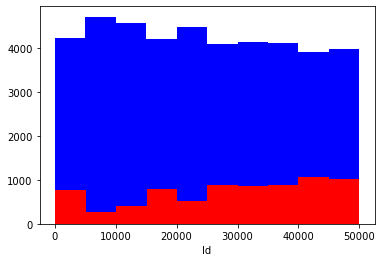

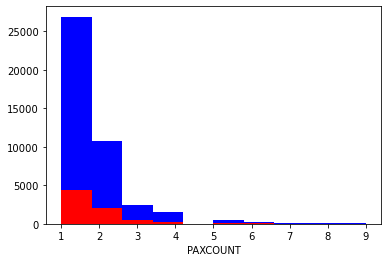

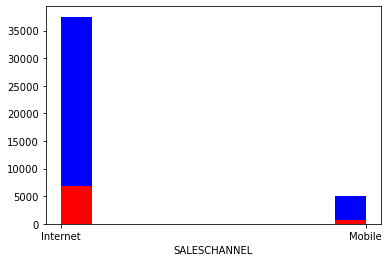

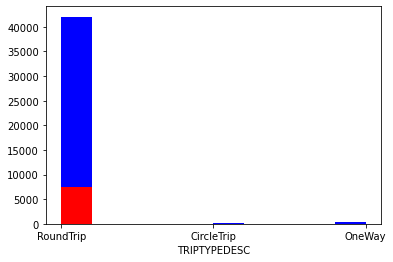

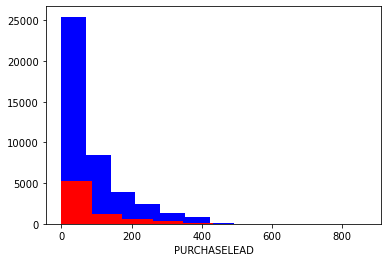

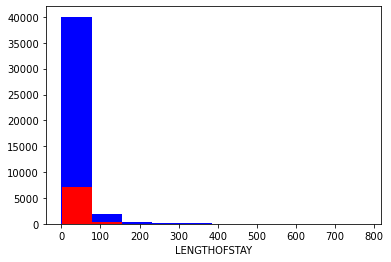

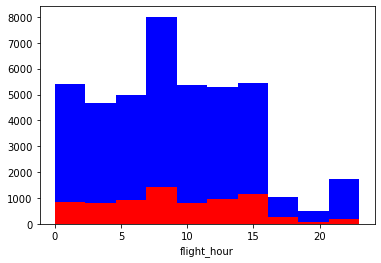

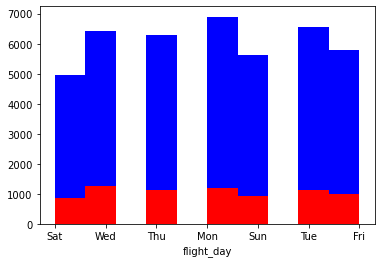

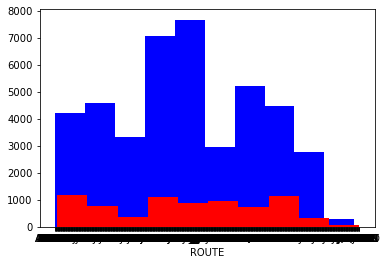

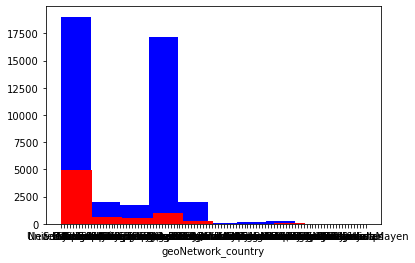

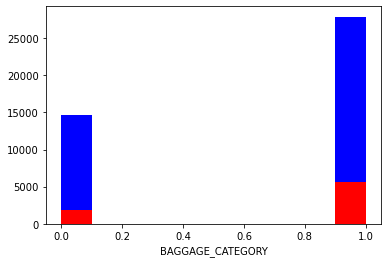

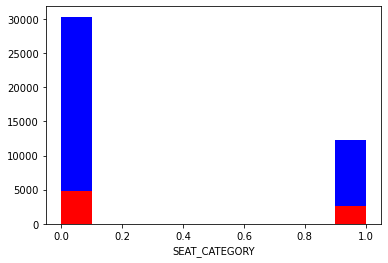

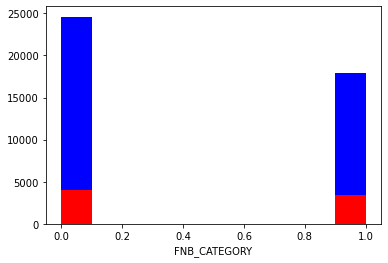

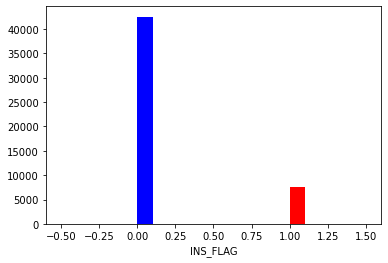

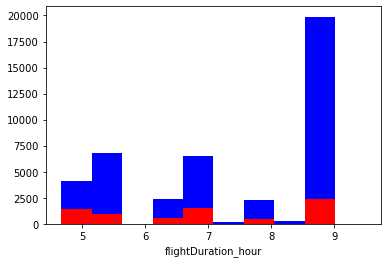

In [ ]:
# Visualizing the relation between numerical variables and target variable
for i in cols:
    plt.hist(data_classA[i],color='blue')
    plt.hist(data_classB[i], color='red')
    plt.xlabel(i)
    plt.show()

In [ ]:
# Removing ID column 
len(data['Id'].unique()) # 50000 , which is equal to the number of rows, this may be dropped

data.drop(['Id'], axis=1,inplace=True)
data.shape

(50000, 14)

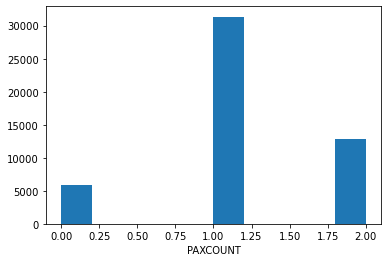

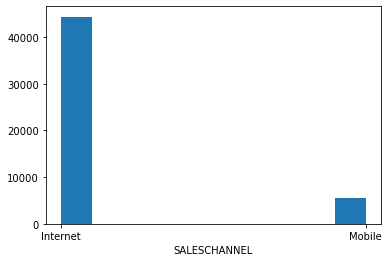

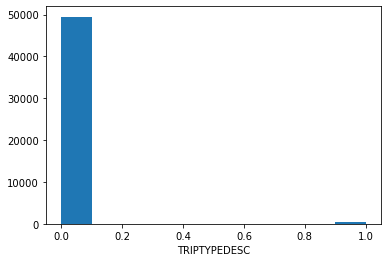

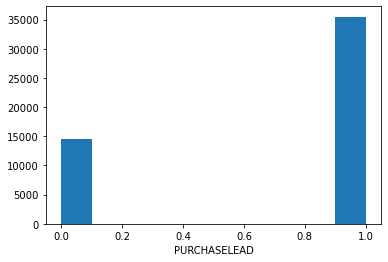

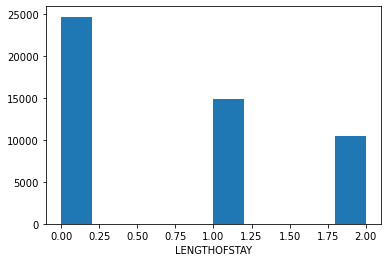

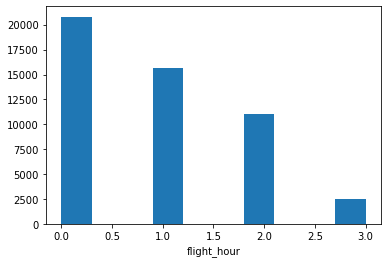

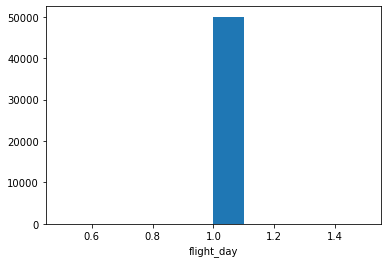

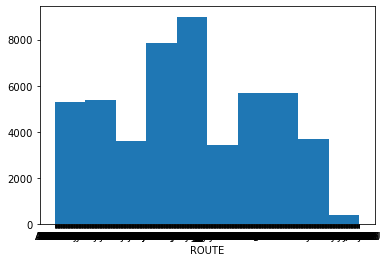

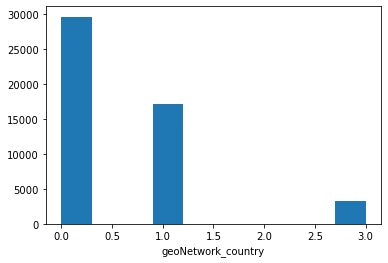

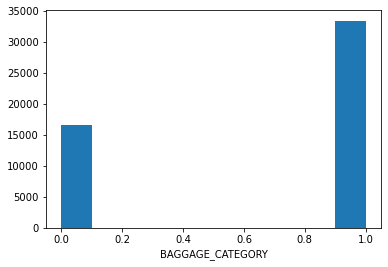

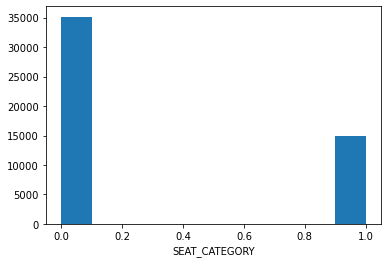

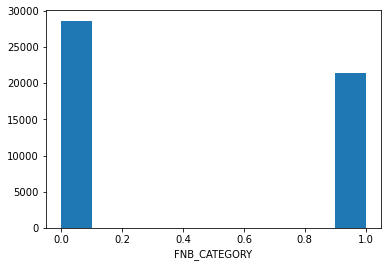

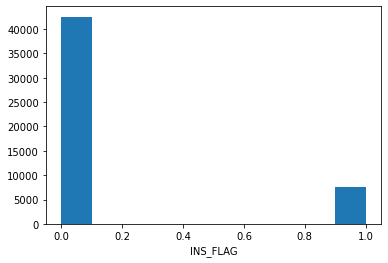

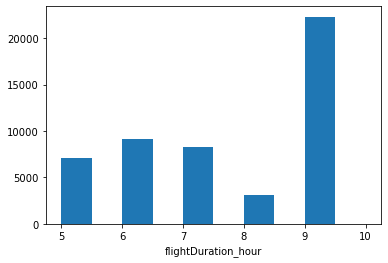

In [ ]:
# Histograms
for i in data.columns:
    plt.hist(data[i])
    plt.xlabel(i)
    plt.show()

<AxesSubplot:>

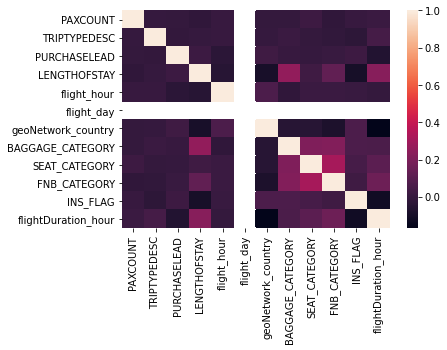

In [ ]:
# Correlation Matrix
sns.heatmap(data.corr())

In [ ]:
string_cols = ['SALESCHANNEL','flight_day', 'ROUTE']

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in string_cols:
    le.fit(data[i])
    data[i] = le.transform(data[i])

In [ ]:
# Checking the No. of Unique Values Again.
for i in data.columns:
    print("{}:{}".format(i,len(data[i].unique())))

PAXCOUNT:3
SALESCHANNEL:2
TRIPTYPEDESC:2
PURCHASELEAD:2
LENGTHOFSTAY:3
flight_hour:4
flight_day:1
ROUTE:799
geoNetwork_country:3
BAGGAGE_CATEGORY:2
SEAT_CATEGORY:2
FNB_CATEGORY:2
INS_FLAG:2
flightDuration_hour:6


In [ ]:
num_cols = list(data.columns)

for i in string_cols:
    num_cols.remove(i)
    
num_cols.remove('INS_FLAG')

### Outlier Removal

In [ ]:
low = 0.01
high = 0.99
quant_df = data.quantile([low, high])
quant_df

,PAXCOUNT,SALESCHANNEL,TRIPTYPEDESC,PURCHASELEAD,LENGTHOFSTAY,flight_hour,flight_day,ROUTE,geoNetwork_country,BAGGAGE_CATEGORY,SEAT_CATEGORY,FNB_CATEGORY,INS_FLAG,flightDuration_hour
0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,5.0
0.99,2.0,1.0,1.0,1.0,2.0,3.0,0.0,778.0,3.0,1.0,1.0,1.0,1.0,9.0


In [ ]:
data['PAXCOUNT'].mask(data['PAXCOUNT'] < quant_df.iloc[0]['PAXCOUNT'] ,inplace=True)
data['PAXCOUNT'].mask(data['PAXCOUNT'] > quant_df.iloc[1]['PAXCOUNT'] ,inplace=True)

data['PURCHASELEAD'].mask(data['PURCHASELEAD'] < quant_df.iloc[0]['PURCHASELEAD'] ,inplace=True)
data['PURCHASELEAD'].mask(data['PURCHASELEAD'] > quant_df.iloc[1]['PURCHASELEAD'] ,inplace=True)

data['LENGTHOFSTAY'].mask(data['LENGTHOFSTAY'] < quant_df.iloc[0]['LENGTHOFSTAY'] ,inplace=True)
data['LENGTHOFSTAY'].mask(data['LENGTHOFSTAY'] > quant_df.iloc[1]['LENGTHOFSTAY'] ,inplace=True)

data['flight_hour'].mask(data['flight_hour'] < quant_df.iloc[0]['flight_hour'] ,inplace=True)
data['flight_hour'].mask(data['flight_hour'] > quant_df.iloc[1]['flight_hour'] ,inplace=True)

data['BAGGAGE_CATEGORY'].mask(data['BAGGAGE_CATEGORY'] < quant_df.iloc[0]['BAGGAGE_CATEGORY'] ,inplace=True)
data['BAGGAGE_CATEGORY'].mask(data['BAGGAGE_CATEGORY'] > quant_df.iloc[1]['BAGGAGE_CATEGORY'] ,inplace=True)

data['SEAT_CATEGORY'].mask(data['SEAT_CATEGORY'] < quant_df.iloc[0]['SEAT_CATEGORY'] ,inplace=True)
data['SEAT_CATEGORY'].mask(data['SEAT_CATEGORY'] > quant_df.iloc[1]['SEAT_CATEGORY'] ,inplace=True)

data['FNB_CATEGORY'].mask(data['FNB_CATEGORY'] < quant_df.iloc[0]['FNB_CATEGORY'] ,inplace=True)
data['FNB_CATEGORY'].mask(data['FNB_CATEGORY'] > quant_df.iloc[1]['FNB_CATEGORY'] ,inplace=True)

data['flightDuration_hour'].mask(data['flightDuration_hour'] < quant_df.iloc[0]['flightDuration_hour'] ,inplace=True)
data['flightDuration_hour'].mask(data['flightDuration_hour'] > quant_df.iloc[1]['flightDuration_hour'] ,inplace=True)


In [ ]:
data.isna().sum()

PAXCOUNT                0
SALESCHANNEL            0
TRIPTYPEDESC            0
PURCHASELEAD            0
LENGTHOFSTAY            0
flight_hour             0
flight_day              0
ROUTE                   0
geoNetwork_country      0
BAGGAGE_CATEGORY        0
SEAT_CATEGORY           0
FNB_CATEGORY            0
INS_FLAG                0
flightDuration_hour    37
dtype: int64

In [ ]:
data.fillna(data.mean(), inplace=True)

### Training

In [ ]:
from sklearn.model_selection import train_test_split
data_old = data.copy()

X = data.drop(['INS_FLAG','flight_hour', 'SALESCHANNEL', 'TRIPTYPEDESC','flight_day'], axis=1)
y = data['INS_FLAG']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## LGBM 

### Prediction with basic model 

In [ ]:
clf = LGBMClassifier(is_unbalance = True).fit(X_train.values,y_train)
predictions = clf.predict(X_test)

### Confusion matrix

In [ ]:
print(confusion_matrix(y_test, predictions))
print("="*60)
print(classification_report(y_test, predictions))
print("F1 Score : {}".format(f1_score(y_test,predictions)))
# plot roc auc

[[2824 1410]
 [ 207  559]]
              precision    recall  f1-score   support

           0       0.93      0.67      0.78      4234
           1       0.28      0.73      0.41       766

    accuracy                           0.68      5000
   macro avg       0.61      0.70      0.59      5000
weighted avg       0.83      0.68      0.72      5000

F1 Score : 0.4087751371115174


In [ ]:
act = y_test.values
predict = predictions
confusion_matrix_custom(act, predict)

Actual, Predicted Observations:   5000 5000
--------------------------------------------
Confusion Matrix
--------------------------------------------
               Predicted N Predicted Y
Actual N       2824            1410
Actual Y       207            559
--------------------------------------------
Total observations  :   5000
False Positives     :   1410
False Negatives     :   207
Overall Accuracy    :   67.66 %
Sensitivity/Recall  :   72.98 %
Specificity         :   66.7 %
Precision           :   28.39 %
--------------------------------------------


### ROC Curve and AUC 

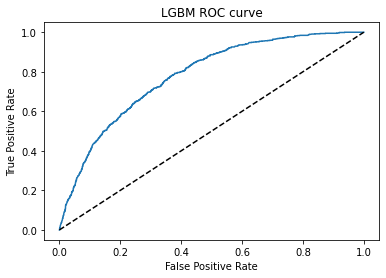

The AUC ROC Score is 0.6983732953795645


In [ ]:
probs = clf.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LGBM ROC curve')
# show the plot
plt.show()

print("The AUC ROC Score is {}".format(roc_auc_score(y_test, predictions)))

### Feature Importance

Feature: 0, Score: 161.00000
Feature: 1, Score: 122.00000
Feature: 2, Score: 208.00000
Feature: 3, Score: 1628.00000
Feature: 4, Score: 344.00000
Feature: 5, Score: 102.00000
Feature: 6, Score: 101.00000
Feature: 7, Score: 107.00000
Feature: 8, Score: 227.00000


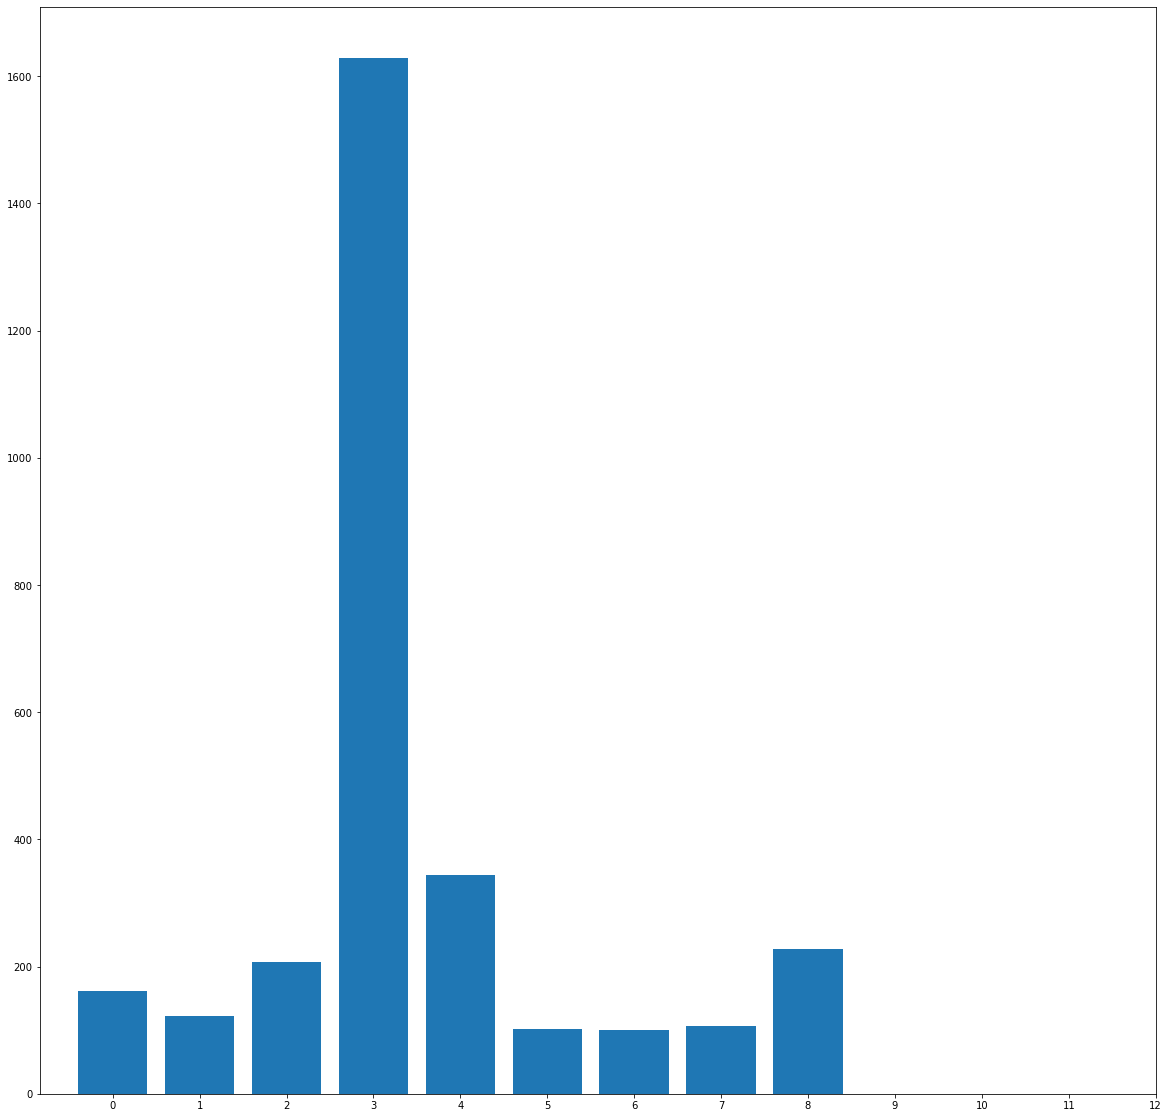

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

importance = clf.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))


    # plot feature importance
figure(figsize=(20, 20))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(list(range(0,13)))
plt.show()

In [ ]:
X.columns

Index(['PAXCOUNT', 'PURCHASELEAD', 'LENGTHOFSTAY', 'ROUTE',
       'geoNetwork_country', 'BAGGAGE_CATEGORY', 'SEAT_CATEGORY',
       'FNB_CATEGORY', 'flightDuration_hour'],
      dtype='object')

## Summary 